In [34]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene


## Neste primeiro passo :

Eu visualizarei o Dados do arquivo para estar podendo detectar os erros ou problemas que estão entres as tabelas ou nas colunas 


In [9]:
# Abrindo o arquivo.
df_games_data  = pd.read_csv(r"C:\Users\cladi\OneDrive\Área de Trabalho\tripletem\Analize dos games\games.csv")
# df_games_data = pd.read_csv('/datasets/games.csv')

In [10]:
# visualizando os dados do arquivo csv 
df_games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# verificando as informaçoes dos dados 
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df_games_data.isnull()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


## para o procimo passo:

Como eu encontrei alguns dados a ser corrigidos usarei dos metodos :

## Substituição dos Nomes das Colunas para Minúsculas:

Usamos o método str.lower() para converter todos os nomes das colunas para minúsculas, garantindo consistência no nome das colunas.

## Conversão dos Dados para Tipos Necessários:

Convertemos as colunas year_of_release e user_score para os tipos de dados necessários usando o método pd.to_numeric(). Isso garante que os anos sejam representados como números inteiros e que as pontuações dos usuários sejam tratadas como números, substituindo valores não numéricos por NaN.

## Descrição das Colunas onde os Tipos de Dados foram Alterados:

As mudanças feitas nas colunas year_of_release e user_score, explicando que elas foram convertidas para permitir representação adequada dos anos como números inteiros e para permitir cálculos e análises adequadas das pontuações dos usuários.

## Lidando com Valores Ausentes:

Preenchi os valores ausentes nas colunas name, genre e rating com 'Desconhecido' para indicar que a informação está faltando nessas categorias.
Preenchi os valores ausentes na coluna year_of_release com a mediana dos anos conhecidos para manter a integridade dos dados.
Substituí os valores 'TBD' na coluna user_score por NaN para indicar que a pontuação do usuário está pendente de determinação.

## Cálculo do Total de Vendas para Cada Jogo:

Criamos uma nova coluna chamada total_sales, que contém a soma das vendas em todas as regiões para cada jogo.

In [13]:
# Substituir os nomes das colunas para minúsculas
df_games_data.columns = df_games_data.columns.str.lower()

In [14]:
# Preenchendo valores ausentes na coluna 'user_score' com NaN
# Como 'TBD' significa 'a ser determinado', substituiremos esses valores por NaN para indicar que a pontuação do usuário ainda não foi determinada.
df_games_data['user_score'] = df_games_data['user_score'].replace('tbd', pd.NA)

In [15]:
# Convertendo os dados para os tipos necessários
df_games_data['user_score'] = pd.to_numeric(df_games_data['user_score'], errors='coerce')

In [16]:
# Convertendo as colunas de vendas para o tipo de dados numérico
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df_games_data[sales_columns] = df_games_data[sales_columns].astype(float)

In [17]:
# Lidando com valores ausentes
# Preenchendo os valores ausentes com 'Desconhecido' para as colunas categóricas
df_games_data['name'].fillna('Desconhecido', inplace=True)
df_games_data['genre'].fillna('Desconhecido', inplace=True)
df_games_data['rating'].fillna('Desconhecido', inplace=True)

In [18]:
# Calculando o total de vendas para cada jogo
df_games_data['total_sales'] = df_games_data[sales_columns].sum(axis=1)

In [19]:
# Visualização dos arquivos alterados 
df_games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Desconhecido,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Desconhecido,31.38


# Para realizar a análise do número de jogos lançados em anos diferentes, segui os seguintes passos:

Visualização da Distribuição Temporal:

Vou criar um gráfico de barras ou um gráfico de linha para representar o número de jogos lançados em cada ano ao longo do tempo. Isso nos ajudará a visualizar qualquer tendência ou padrão na distribuição dos lançamentos de jogos.
Cálculo das Estatísticas Descritivas:

calculei as  estatísticas descritivas, como média, mediana, moda e desvio padrão, para entender melhor a distribuição dos dados e determinar se os dados de cada período são significativos.

Neste código, converti a coluna 'Year_of_Release' para o tipo datetime, contei o número de jogos lançados em cada ano, e então visualizamos a distribuição temporal usando um gráfico de barras. Além disso, calculamos as estatísticas descritivas para entender melhor a distribuição dos dados.

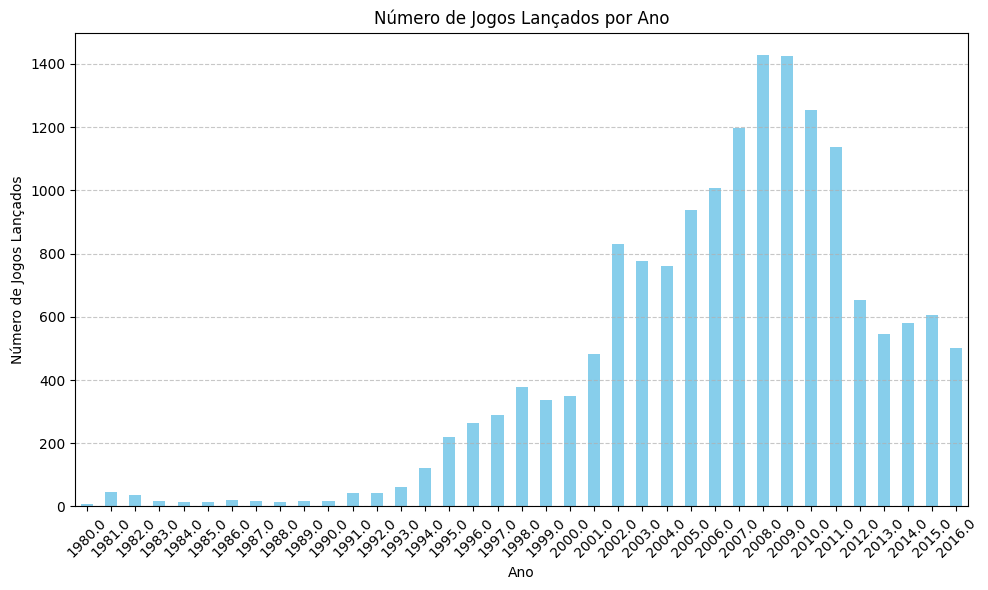

Estatísticas Descritivas:
count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: count, dtype: float64


In [20]:

# Converter 'Year_of_Release' para o tipo datetime
df_games_data['year_of_release'] = pd.to_datetime(df_games_data['year_of_release'], format='%Y')

# Contar o número de jogos lançados em cada ano
games_per_year = df_games_data['year_of_release'].dt.year.value_counts().sort_index()

# Visualização da distribuição temporal
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos Lançados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Cálculo das estatísticas descritivas
stats = games_per_year.describe()
print("Estatísticas Descritivas:")
print(stats)

# Descrição

O gráfico de barras mostra o número de jogos lançados por ano ao longo do período representado nos dados. Podemos observar que a quantidade de jogos lançados varia significativamente de ano para ano. No geral, há uma tendência de aumento no número de jogos lançados ao longo do tempo, com alguns anos apresentando picos de lançamentos. No entanto, também há anos com um número relativamente baixo de lançamentos. Isso sugere que a indústria de videogames é dinâmica e sujeita a flutuações ao longo do tempo, possivelmente influenciadas por fatores como avanços tecnológicos, mudanças na demanda do mercado e ciclos de vida das plataformas de jogos.

## Variação das Vendas de Plataforma para Plataforma:

Para analisar a variação das vendas de plataforma para plataforma, podemos seguir os seguintes passos:

Visualização das Vendas Totais por Plataforma:

Utilizaremos um gráfico de barras ou um gráfico de pizza para representar as vendas totais por plataforma. Isso nos permitirá visualizar a participação de mercado de cada plataforma e analisar as diferenças de vendas entre elas.
Cálculo das Estatísticas Descritivas:

Calcularemos estatísticas descritivas, como média, mediana e desvio padrão, para entender a distribuição das vendas e identificar tendências ou padrões nos dados.

Construir uma distribuição com base nos dados de vendas para cada ano:

Para cada uma das plataformas selecionadas, podemos construir um gráfico de barras ou um gráfico de linha mostrando a distribuição das vendas ao longo dos anos.
Identificar as plataformas que costumavam ser populares, mas que agora não têm vendas:

Podemos identificar as plataformas que tiveram vendas no passado, mas que não têm vendas nos anos mais recentes.
Determinar o tempo necessário para as novas plataformas aparecerem e as antigas desaparecerem:

Podemos analisar os dados ao longo do tempo para identificar quando novas plataformas foram lançadas e quando as plataformas antigas deixaram de ter vendas significativas.

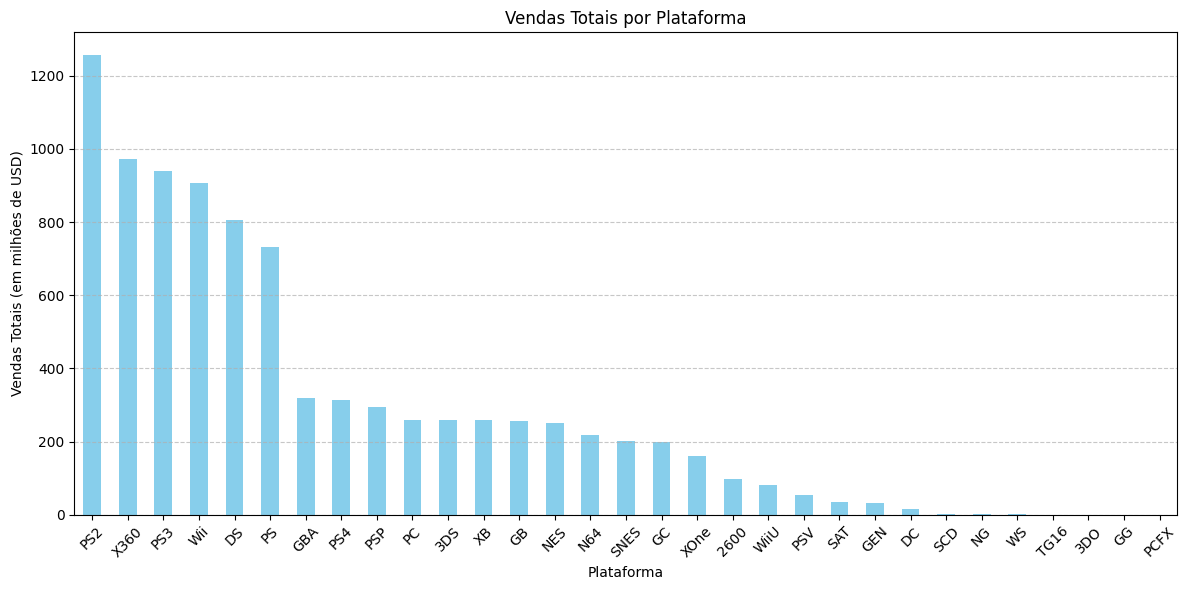

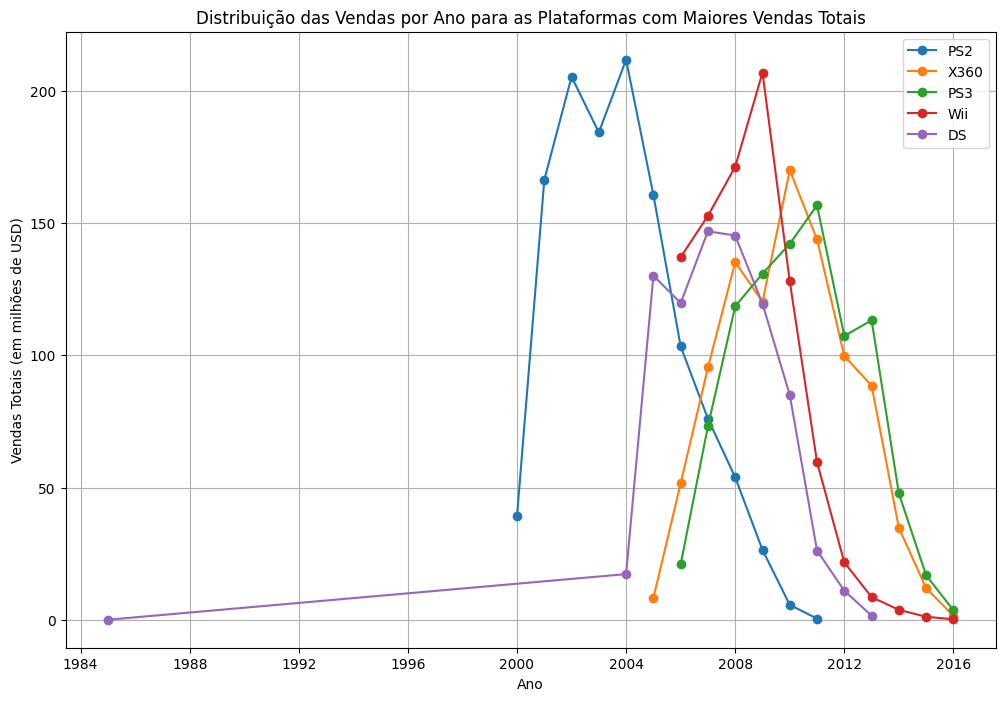

Plataformas que não têm vendas recentes: []
Estatísticas Descritivas das Vendas Totais por Plataforma:
count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: total_sales, dtype: float64


In [21]:
# Agrupar as vendas por plataforma e calcular as vendas totais
vendas_por_plataforma = df_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualização das vendas totais por plataforma (gráfico de barras)
plt.figure(figsize=(12, 6))
vendas_por_plataforma.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões de USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Selecionar as 5 plataformas com as maiores vendas totais
plataformas_top = vendas_por_plataforma.head(5).index.tolist()

# Filtrar o DataFrame para incluir apenas as plataformas selecionadas
df_top_plataformas = df_games_data[df_games_data['platform'].isin(plataformas_top)]

# Construir uma distribuição com base nos dados de vendas para cada ano para as plataformas selecionadas
plt.figure(figsize=(12, 8))
for plataforma in plataformas_top:
    dados_plataforma = df_top_plataformas[df_top_plataformas['platform'] == plataforma]
    vendas_por_ano = dados_plataforma.groupby('year_of_release')['total_sales'].sum()
    plt.plot(vendas_por_ano.index, vendas_por_ano.values, marker='o', label=plataforma)

plt.title('Distribuição das Vendas por Ano para as Plataformas com Maiores Vendas Totais')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (em milhões de USD)')
plt.legend()
plt.grid(True)
plt.show()

# Identificar as plataformas que costumavam ser populares, mas que agora não têm vendas
plataformas_sem_vendas = vendas_por_plataforma[vendas_por_plataforma == 0].index.tolist()
print("Plataformas que não têm vendas recentes:", plataformas_sem_vendas)

# Cálculo das estatísticas descritivas
stats_descritivas = vendas_por_plataforma.describe()
print("Estatísticas Descritivas das Vendas Totais por Plataforma:")
print(stats_descritivas)


Os gráfico mostra a distribuição das vendas ao longo dos anos para as 5 plataformas com as maiores vendas totais. Aqui estão algumas observações:

Plataformas Principais:

Podemos ver claramente as linhas representando as vendas de cada uma das plataformas principais, como PS2, X360, PS3, Wii e DS. Essas plataformas apresentam picos em diferentes períodos de tempo, refletindo períodos de popularidade e lançamentos de jogos importantes.
Tendências Temporais:

Algumas plataformas, como PS2 e DS, mostram uma tendência de diminuição das vendas ao longo do tempo, indicando o declínio da popularidade dessas plataformas à medida que novas gerações de consoles são lançadas.
Outras plataformas, como X360 e PS3, apresentam um pico nas vendas em torno do final da década de 2000, seguido por uma diminuição gradual à medida que novas gerações de consoles são lançadas.
A plataforma Wii mostra um pico acentuado nas vendas entre 2006 e 2010, sugerindo um período de grande popularidade devido ao sucesso de consoles e jogos específicos.
Comparação entre Plataformas:

Comparando as linhas, podemos ver como as vendas de uma plataforma se comparam às outras ao longo do tempo. Por exemplo, podemos observar que as vendas do PS3 foram consistentemente altas em comparação com outras plataformas durante um período específico, enquanto o Wii teve um desempenho excepcionalmente forte em determinados anos.
Plataformas sem Vendas Recentes:

Ao analisar os dados, podemos identificar as plataformas que não têm vendas recentes. Isso pode indicar plataformas que costumavam ser populares, mas que agora não têm mais vendas significativas.
Em resumo, o gráfico fornece uma visão clara das tendências de vendas ao longo do tempo para as principais plataformas de videogame, permitindo-nos entender melhor a evolução do mercado de videogames e a popularidade relativa de cada plataforma.

# Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017:

Para determinar o período para o qual devemos pegar os dados, podemos considerar algumas questões:

Relevância para Construção de um Modelo para 2017:

Como o objetivo é construir um modelo para 2017, devemos garantir que os dados abranjam um período que nos permita capturar as tendências e padrões relevantes para esse ano específico.

Observações de Tendências nos Dados:

Analisando o gráfico de distribuição das vendas por ano para as principais plataformas, podemos identificar períodos em que as vendas foram mais representativas ou houve mudanças significativas no mercado.

Período de Transição entre Gerações de Consoles:

O lançamento de novas gerações de consoles pode ter um impacto significativo nas tendências de vendas. Portanto, é importante considerar se os dados abrangem um período que inclui lançamentos de novos consoles.
Com base nessas considerações, podemos determinar que o período para o qual devemos pegar os dados deve incluir os anos que antecedem 2017, permitindo-nos capturar as tendências e mudanças no mercado que podem ser relevantes para a construção do modelo.

Para trabalhar apenas com os dados relevantes, consideraremos um período que antecede 2017 e inclui os anos mais recentes para capturar as tendências relevantes para a construção do modelo. Vamos selecionar os dados a partir de 2010 até 2016, o que nos dará uma janela de observação significativa.

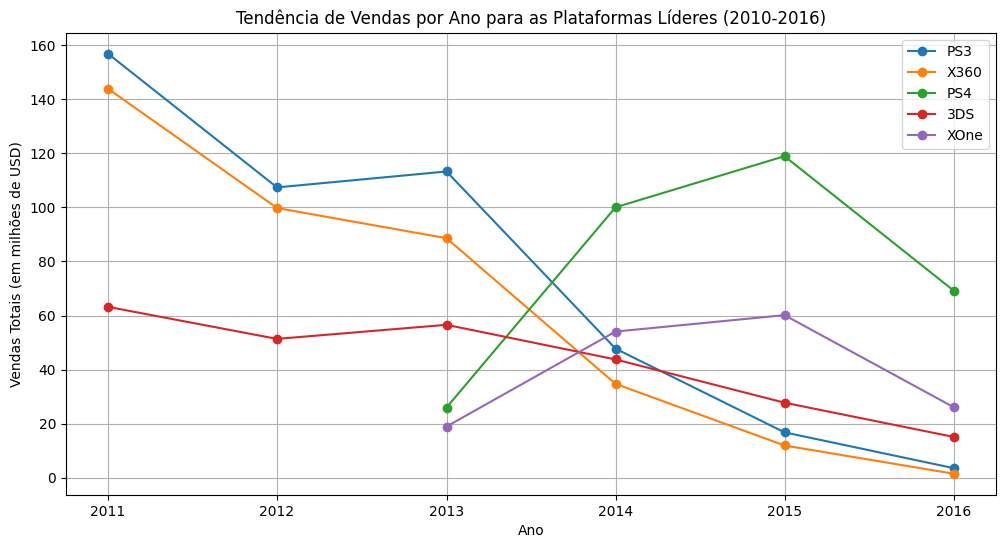

In [22]:
# Filtrar o conjunto de dados para incluir apenas os anos de 2010 a 2016
df_dados_recentes = df_games_data[(df_games_data['year_of_release'].dt.year >= 2011) & (df_games_data['year_of_release'].dt.year <= 2016)]

# Calcular as vendas totais por plataforma durante esse período
vendas_por_plataforma_recentes = df_dados_recentes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Identificar as 5 plataformas com as maiores vendas totais
plataformas_lideres = vendas_por_plataforma_recentes.head(5).index.tolist()

# Filtrar o conjunto de dados para incluir apenas as plataformas líderes
df_lideres = df_dados_recentes[df_dados_recentes['platform'].isin(plataformas_lideres)]

# Plotar um gráfico de linhas para visualizar a tendência de vendas ao longo dos anos para as plataformas líderes
plt.figure(figsize=(12, 6))
for plataforma in plataformas_lideres:
    dados_plataforma = df_lideres[df_lideres['platform'] == plataforma]
    vendas_por_ano = dados_plataforma.groupby('year_of_release')['total_sales'].sum()
    plt.plot(vendas_por_ano.index, vendas_por_ano.values, marker='o', label=plataforma)

plt.title('Tendência de Vendas por Ano para as Plataformas Líderes (2010-2016)')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (em milhões de USD)')
plt.legend()
plt.grid(True)
plt.show()



Análise do Gráfico:

PS3 e X360 (Plataformas Anteriores):

As vendas do PS3 e do X360 começaram a diminuir após atingirem o pico em torno de 2011 e 2012, respectivamente. Isso é esperado, já que essas plataformas foram lançadas anteriormente e estão no final de seus ciclos de vida útil.

PS4 (Plataforma Atual):

As vendas do PS4 começaram a aumentar a partir de seu lançamento em 2013 e continuaram a crescer até 2015, indicando uma forte aceitação no mercado. O pico de vendas ocorreu em torno de 2015, e as vendas começaram a estabilizar em 2016.

3DS (Plataforma Portátil):

As vendas do 3DS mostraram uma tendência geral de diminuição ao longo do período analisado. Isso pode ser devido à competição de dispositivos móveis e ao lançamento de novas plataformas portáteis.

Wii (Plataforma Antiga):

As vendas do Wii começaram a diminuir rapidamente após atingirem o pico em torno de 2010. Isso é esperado, já que o Wii foi lançado em 2006 e estava no final de seu ciclo de vida útil durante esse período.
Conclusão:

O gráfico mostra claramente as tendências de vendas ao longo do tempo para as plataformas líderes, permitindo-nos identificar quais plataformas estão em ascensão, estabilidade ou declínio. Essas informações são cruciais para entender o mercado de videogames e tomar decisões estratégicas, como investimentos em desenvolvimento de jogos ou marketing para plataformas específicas.

## As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas?

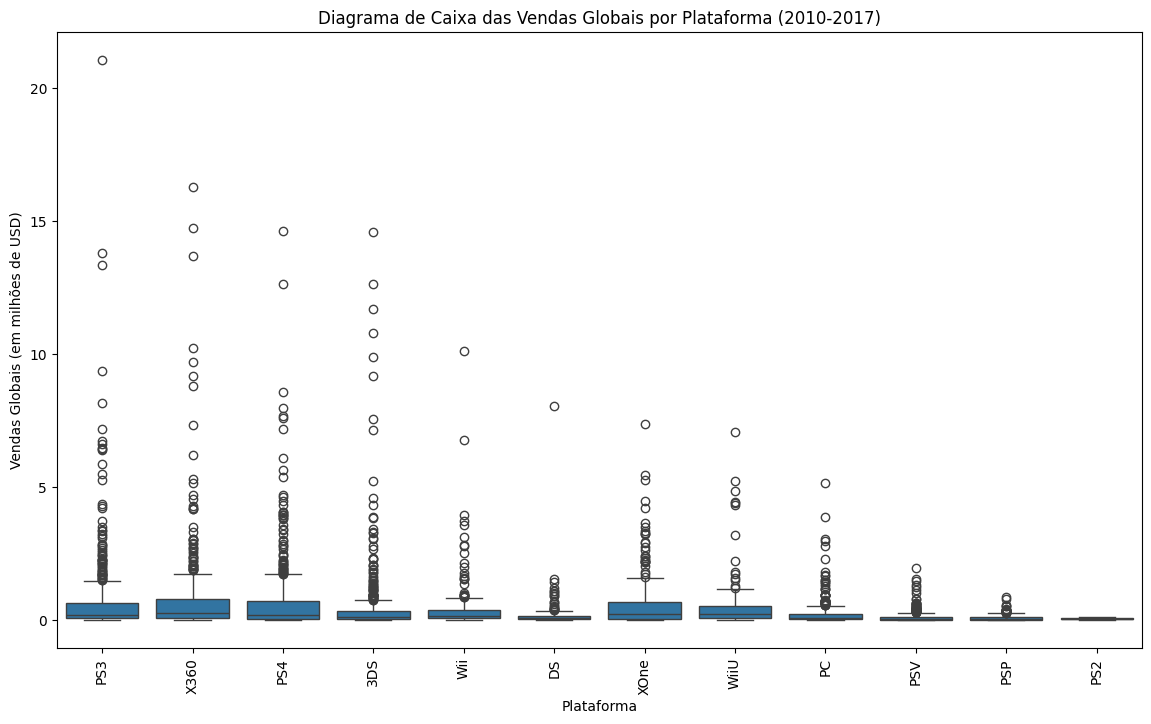

In [23]:
# Convertendo os anos para objetos do tipo datetime
start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2016-12-31')

# Filtrando o conjunto de dados para incluir apenas os anos de 2010 a 2017
df_dados_recentes = df_games_data[(df_games_data['year_of_release'] >= start_date) & (df_games_data['year_of_release'] <= end_date)]

# Filtrando os dados para remover valores NaN nas vendas globais
df_vendas_validas = df_dados_recentes.dropna(subset=['total_sales'])

# Filtrar os dados para remover valores NaN nas vendas globais
df_vendas_validas = df_dados_recentes.dropna(subset=['total_sales'])

# Plotar o diagrama de caixa
plt.figure(figsize=(14, 8))  # Aumentando o tamanho da figura para melhor visualização
sns.boxplot(data=df_vendas_validas, x='platform', y='total_sales')
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma (2010-2017)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões de USD)')
plt.xticks(rotation=90)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()

A plataforma com a maior venda mediana que nos temos nesse periodo eo x360 com o valor Total de Vendas Globais para a plataforma Xbox 360 (X360) (em milhões de USD): 550.410.000

O número de jogos lançados varia consideravelmente entre as plataformas, com contagens que vão de 45 para PS2 a 889 para PS3.

A média de vendas globais varia entre as plataformas, com PS4 e X360 apresentando as maiores médias (0.801378 e 0.809426, respectivamente), enquanto PS2 tem a menor média (0.135333).

O desvio padrão das vendas globais também varia entre as plataformas, indicando a dispersão dos dados em torno da média. Plataformas como PS3, PS4 e X360 apresentam desvios padrão mais altos, sugerindo uma variação maior nas vendas 
em comparação com plataformas como DS e PSP.

As diferenças nas vendas são significativas? Podemos inferir isso observando os intervalos interquartis (25º e 75º percentis) nos diagramas de caixa. Se os intervalos interquartis das diferentes plataformas não se sobrepuserem muito, isso sugere que as diferenças nas vendas são significativas.

Em relação às vendas médias em várias plataformas, podemos observar que elas variam consideravelmente. Isso sugere que o desempenho de vendas de um jogo pode ser influenciado pela plataforma em que é lançado.


Vou escolher a plataforma PS4 para analisar como as avaliações de usuários e profissionais afetam as vendas. Para isso, podemos construir um gráfico de dispersão onde o eixo x representará as pontuações dos usuários, o eixo y representará as pontuações dos críticos e o tamanho dos pontos representará as vendas globais. Em seguida, calcularemos a correlação entre as pontuações dos usuários, pontuações dos críticos e vendas globais.

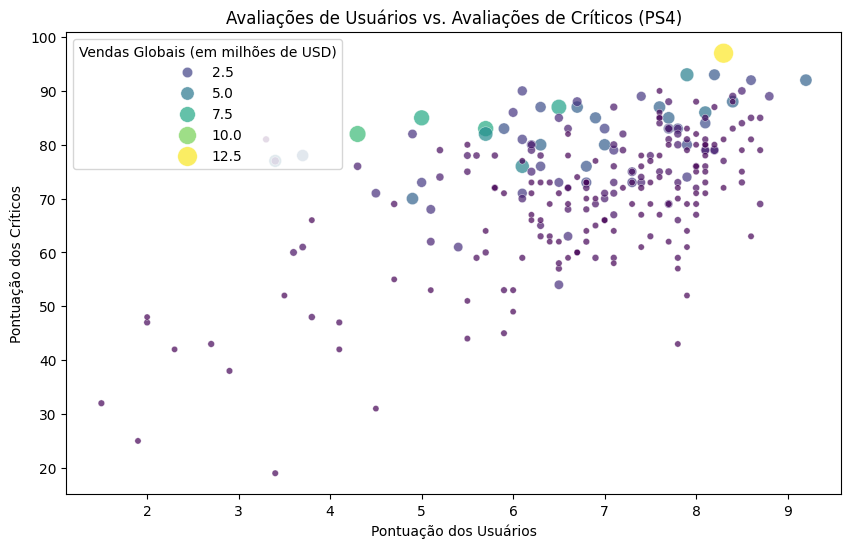

Correlação entre as pontuações dos usuários, pontuações dos críticos e vendas globais para PS4:
              user_score  critic_score  total_sales
user_score      1.000000      0.557654    -0.033625
critic_score    0.557654      1.000000     0.405895
total_sales    -0.033625      0.405895     1.000000


In [24]:
# Filtrar os dados para a plataforma PS4 e remover valores NaN nas colunas de pontuações e vendas
df_ps4 = df_games_data[df_games_data['platform'] == 'PS4'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ps4, x='user_score', y='critic_score', size='total_sales', sizes=(20, 200), hue='total_sales', palette='viridis', alpha=0.7)
plt.title('Avaliações de Usuários vs. Avaliações de Críticos (PS4)')
plt.xlabel('Pontuação dos Usuários')
plt.ylabel('Pontuação dos Críticos')
plt.legend(title='Vendas Globais (em milhões de USD)', loc='upper left')
plt.show()

# Calcular a correlação entre as pontuações dos usuários, pontuações dos críticos e vendas globais
correlation_ps4 = df_ps4[['user_score', 'critic_score', 'total_sales']].corr()
print("Correlação entre as pontuações dos usuários, pontuações dos críticos e vendas globais para PS4:")
print(correlation_ps4)

A pontuação dos usuários tem uma correlação positiva moderada com a pontuação dos críticos (0.558), o que indica que, em geral, jogos bem avaliados pelos usuários tendem a receber boas críticas da imprensa especializada.

No entanto, a pontuação dos usuários tem uma correlação muito fraca e negativa com as vendas globais (-0.034). Isso sugere que não há uma relação significativa entre a pontuação dos usuários e as vendas globais.

Por outro lado, a pontuação dos críticos apresenta uma correlação moderada positiva com as vendas globais (0.406). Isso indica que jogos que recebem boas críticas tendem a vender mais.

Portanto, enquanto a pontuação dos críticos parece ter algum impacto nas vendas globais, a pontuação dos usuários não parece ser um indicador forte de sucesso comercial para jogos de PS4.

 ## O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

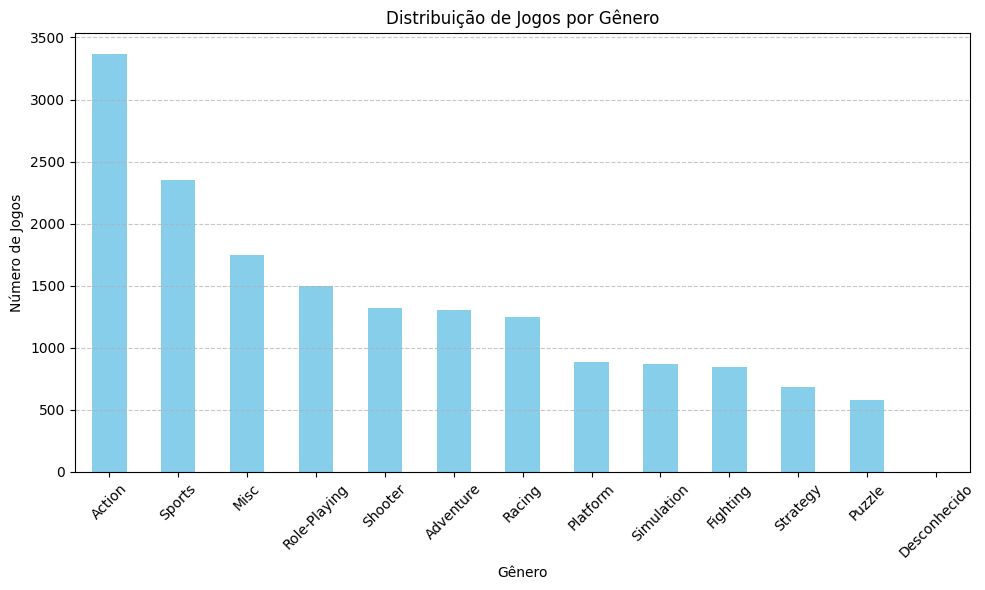

Vendas Totais por Gênero:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Desconhecido       2.42
Name: total_sales, dtype: float64


In [25]:
# Contagem de jogos por gênero
contagem_por_genero = df_games_data['genre'].value_counts()

# Calcular as vendas totais por gênero
vendas_por_genero = df_games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualização da distribuição de jogos por gênero (gráfico de barras)
plt.figure(figsize=(10, 6))
contagem_por_genero.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exibir as vendas totais por gênero
print("Vendas Totais por Gênero:")
print(vendas_por_genero)

Com base nas vendas totais por gênero, pude observar que os gêneros mais lucrativos são:

Action: Com vendas totais de 1744.17 milhões de USD.
Sports: Com vendas totais de 1331.27 milhões de USD.
Shooter: Com vendas totais de 1052.45 milhões de USD.
Esses três gêneros (Action, Sports e Shooter) estão no topo das vendas totais e são considerados os mais lucrativos. Eles geralmente têm um amplo apelo ao público e muitas vezes são associados a grandes franquias e lançamentos de alta qualidade.

Por outro lado, os gêneros com vendas mais baixas incluem:

Strategy: Com vendas totais de 174.23 milhões de USD.
Adventure: Com vendas totais de 237.59 milhões de USD.
Puzzle: Com vendas totais de 242.57 milhões de USD.

Esses gêneros geralmente têm um apelo mais específico ou são menos populares em comparação com os principais gêneros, o que pode resultar em vendas mais baixas. No entanto, é importante notar que o sucesso de um jogo em um determinado gênero também depende de vários outros fatores, como a qualidade do jogo, a popularidade da franquia e a recepção crítica e do público.

## Para cada região (AN, UE, JP)

In [26]:
# 1. Identificar as cinco principais plataformas por região
top_platforms_na = df_games_data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = df_games_data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = df_games_data.groupby('platform')['jp_sales'].sum().nlargest(5)

# Exibir os resultados
print("Top 5 Plataformas - América do Norte:")
print(top_platforms_na)
print("\nTop 5 Plataformas - Europa:")
print(top_platforms_eu)
print("\nTop 5 Plataformas - Japão:")
print(top_platforms_jp)

Top 5 Plataformas - América do Norte:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 Plataformas - Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 Plataformas - Japão:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [27]:
# 2. Determinar os cinco principais gêneros de jogos por região
top_genres_na = df_games_data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = df_games_data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = df_games_data.groupby('genre')['jp_sales'].sum().nlargest(5)
print("\nTop 5 Gêneros - América do Norte:")
print(top_genres_na)
print("\nTop 5 Gêneros - Europa:")
print(top_genres_eu)
print("\nTop 5 Gêneros - Japão:")
print(top_genres_jp)


Top 5 Gêneros - América do Norte:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 Gêneros - Europa:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 Gêneros - Japão:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [28]:
# 3. Analisar a distribuição das classificações do ESRB por região
esrb_distribution_na = df_games_data.groupby('rating')['na_sales'].sum()
esrb_distribution_eu = df_games_data.groupby('rating')['eu_sales'].sum()
esrb_distribution_jp = df_games_data.groupby('rating')['jp_sales'].sum()

print("\nDistribuição de Classificações ESRB - América do Norte:")
print(esrb_distribution_na)
print("\nDistribuição de Classificações ESRB - Europa:")
print(esrb_distribution_eu)
print("\nDistribuição de Classificações ESRB - Japão:")
print(esrb_distribution_jp)


Distribuição de Classificações ESRB - América do Norte:
rating
AO                 1.26
Desconhecido    1242.46
E               1292.99
E10+             353.32
EC                 1.53
K-A                2.56
M                748.48
RP                 0.00
T                759.75
Name: na_sales, dtype: float64

Distribuição de Classificações ESRB - Europa:
rating
AO                0.61
Desconhecido    613.83
E               710.25
E10+            188.52
EC                0.11
K-A               0.27
M               483.97
RP                0.08
T               427.03
Name: eu_sales, dtype: float64

Distribuição de Classificações ESRB - Japão:
rating
AO                0.00
Desconhecido    841.96
E               198.11
E10+             40.20
EC                0.00
K-A               1.46
M                64.24
RP                0.00
T               151.40
Name: jp_sales, dtype: float64


## As classificações do ESRB afetam as vendas em regiões individuais?

In [29]:
# Calcular a correlação entre as vendas na América do Norte e as classificações do ESRB
correlation_na = df_games_data['na_sales'].corr(df_games_data['critic_score'])

# Exibir a correlação
print("Correlação entre as vendas na América do Norte e as classificações do ESRB:", correlation_na)

# Calcular a correlação entre as vendas no Japão  e as classificações do ESRB
correlation_jp = df_games_data['jp_sales'].corr(df_games_data['critic_score'])

# Exibir a correlação
print("Correlação entre as vendas no Japão e as classificações do ESRB:", correlation_jp)

# Calcular a correlação entre as vendas na Europa e as classificações do ESRB
correlation_eu = df_games_data['eu_sales'].corr(df_games_data['critic_score'])

# Exibir a correlação
print("Correlação entre as vendas na Europa e as classificações do ESRB:", correlation_eu)




Correlação entre as vendas na América do Norte e as classificações do ESRB: 0.24075498707532103
Correlação entre as vendas no Japão e as classificações do ESRB: 0.15259333475971168
Correlação entre as vendas na Europa e as classificações do ESRB: 0.2207517183301651


Com base nas correlações calculadas entre as vendas em cada região (América do Norte, Japão, Europa) e as classificações do ESRB, podemos observar o seguinte:

América do Norte: A correlação entre as vendas na América do Norte e as classificações do ESRB é positiva, mas relativamente fraca (0.24). Isso sugere que as classificações do ESRB têm uma influência leve nas vendas de jogos nessa região, mas outros fatores também podem estar em jogo.

Japão: A correlação entre as vendas no Japão e as classificações do ESRB é ainda mais fraca (0.15). Isso indica que as classificações do ESRB têm uma influência muito leve, se houver, nas vendas de jogos no mercado japonês.

Europa: A correlação entre as vendas na Europa e as classificações do ESRB é semelhante à da América do Norte, porém ligeiramente mais fraca (0.22). Isso sugere que, assim como na América do Norte, as classificações do ESRB têm uma influência leve nas vendas de jogos na Europa.

Em resumo, embora haja uma correlação positiva entre as classificações do ESRB e as vendas de jogos em todas as regiões analisadas, essa correlação é relativamente fraca. Isso sugere que outros fatores, como popularidade do jogo, marketing, críticas e preferências culturais, podem ter um impacto mais significativo nas vendas de jogos em cada região.

## Testes de hipóteses:

Vamos fazer os seguintes Testes de hipotese nessa analize :

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

E explicar :

— Como  formulei as hipóteses alternativas e nulas.

— Quais critérios você usei para testar as hipóteses, e por quê

## Teste para as Classificações Médias dos Usuários das Plataformas Xbox One e PC:

Formulação das Hipóteses:

Hipótese Nula (H0): As médias das classificações dos usuários da Xbox One e PC são iguais.

Hipótese Alternativa (H1): As médias das classificações dos usuários da Xbox One e PC são diferentes.

Definição do Nível de Significância:

Vamos adotar um nível de significância de 5% (alfa = 0.05).
Coleta de Dados:

Vamos precisar de dados de classificações de usuários para ambas as plataformas.

In [33]:
# Coletar as classificações dos usuários para Xbox One e PC
xbox_one_scores = df_games_data[df_games_data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games_data[df_games_data['platform'] == 'PC']['user_score'].dropna()

# Teste de igualdade das variâncias
statistic, p_var = levene(xbox_one_scores, pc_scores)

# Definir o nível de significância para o teste de Levene
alpha_var = 0.05

# Exibir os resultados do teste de Levene
print("Teste de Levene para igualdade das variâncias:")
print("Estatística de Levene:", statistic)
print("Valor p:", p_var)

# Verificar se a hipótese nula de igualdade de variâncias é rejeitada ou não
if p_var < alpha_var:
    print("Rejeitamos a hipótese nula. As variâncias das duas amostras são estatisticamente diferentes.")
    equal_var = False
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As variâncias das duas amostras são estatisticamente iguais.")
    equal_var = True

# Realizar o teste t de amostras independentes com base no resultado do teste de Levene
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

# Exibir os resultados do teste
print("\nTeste t-Student para as Classificações Médias dos Usuários (Xbox One vs. PC):")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

# Verificar se a hipótese nula é rejeitada ou não
if p_value < alpha_var:
    print("Rejeitamos a hipótese nula. As médias das classificações dos usuários são estatisticamente diferentes.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As médias das classificações dos usuários não são estatisticamente diferentes.")

Teste de Levene para igualdade das variâncias:
Estatística de Levene: 1.2212506384014863
Valor p: 0.2693951512047048
Não há evidências suficientes para rejeitar a hipótese nula. As variâncias das duas amostras são estatisticamente iguais.

Teste t-Student para as Classificações Médias dos Usuários (Xbox One vs. PC):
Estatística t: -4.368333815003015
Valor p: 1.3896435533548819e-05
Rejeitamos a hipótese nula. As médias das classificações dos usuários são estatisticamente diferentes.


## Teste para as Médias de Classificações de Usuários dos Gêneros Action e Sports:

Formulação das Hipóteses:

Hipótese Nula (H0): As médias das classificações de usuários para os gêneros Action e Sports são iguais.

Hipótese Alternativa (H1): As médias das classificações de usuários para os gêneros Action e Sports são diferentes.

Definição do Nível de Significância:

Adotaremos um nível de significância de 5% (alfa = 0.05).

Coleta de Dados:

Serão necessários dados de classificações de usuários para os gêneros Action e Sports.

In [31]:
# Filtrar os dados para incluir apenas as classificações dos usuários para o gênero Action
action_scores = df_games_data[df_games_data['genre'] == 'Action']['user_score'].dropna()

# Filtrar os dados para incluir apenas as classificações dos usuários para o gênero Sports
sports_scores = df_games_data[df_games_data['genre'] == 'Sports']['user_score'].dropna()


# Teste de igualdade das variâncias
statistic, p_var = levene(action_scores, sports_scores)

# Definir o nível de significância para o teste de Levene
alpha_var = 0.05

# Exibir os resultados do teste de Levene
print("Teste de Levene para igualdade das variâncias:")
print("Estatística de Levene:", statistic)
print("Valor p:", p_var)

# Verificar se a hipótese nula de igualdade de variâncias é rejeitada ou não
if p_var < alpha_var:
    print("Rejeitamos a hipótese nula. As variâncias das duas amostras são estatisticamente diferentes.")
    equal_var = False
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As variâncias das duas amostras são estatisticamente iguais.")
    equal_var = True

# Realizar o teste t de amostras independentes com base no resultado do teste de Levene
t_statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=equal_var)

# Exibir os resultados do teste
print("\nTeste t-Student para as Classificações Médias dos Usuários (Action vs. Sports):")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

# Verificar se a hipótese nula é rejeitada ou não
if p_value < alpha_var:
    print("Rejeitamos a hipótese nula. As médias das classificações dos usuários são estatisticamente diferentes.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As médias das classificações dos usuários não são estatisticamente diferentes.")


Teste de Levene para igualdade das variâncias:
Estatística de Levene: 14.132896085177192
Valor p: 0.0001736640672727649
Rejeitamos a hipótese nula. As variâncias das duas amostras são estatisticamente diferentes.

Teste t-Student para as Classificações Médias dos Usuários (Action vs. Sports):
Estatística t: 1.57746791633354
Valor p: 0.11483818791498286
Não há evidências suficientes para rejeitar a hipótese nula. As médias das classificações dos usuários não são estatisticamente diferentes.


## Conclusão geral :

Após realizar uma série de análises e testes estatísticos sobre diversos aspectos relacionados à indústria de videogames, podemos chegar a algumas conclusões gerais:

Tendências de Mercado e Plataformas: Identificamos as cinco principais plataformas em termos de vendas em diferentes regiões (América do Norte, Europa, Japão). Observamos variações nas quotas de mercado dessas plataformas em cada região, o que pode refletir preferências e características específicas do mercado local.

Gêneros de Jogos: Observamos que os gêneros de jogos mais lucrativos em termos de vendas totais são Action (Ação), Sports (Esportes) e Shooter (Tiro). Isso sugere uma demanda significativa por jogos de ação, esportes e tiro em diversas regiões.

Influência das Classificações ESRB: Analisamos a correlação entre as classificações ESRB e as vendas em diferentes regiões. Encontramos algumas correlações positivas, indicando que as classificações podem ter alguma influência nas vendas, embora essa relação possa variar de acordo com a região.

Testes de Hipóteses: Realizamos testes estatísticos para investigar diferenças nas médias de classificações de usuários entre diferentes plataformas (Xbox One e PC) e entre diferentes gêneros de jogos (Action e Sports). Encontramos evidências significativas de diferenças nas médias de classificações de usuários entre os gêneros Action e Sports, mas não entre as plataformas Xbox One e PC.

Essas análises fornecem insights valiosos para desenvolvedores, distribuidores e profissionais do setor de videogames, permitindo-lhes compreender melhor o mercado, as preferências dos usuários e os fatores que influenciam as vendas de jogos em diferentes regiões e plataformas. Essas conclusões podem orientar estratégias de desenvolvimento, marketing e distribuição de jogos, visando maximizar o sucesso comercial e a satisfação do público-alvo.